# KKBox Music Recommendation Challenge

**Final Functions**

Importing necessary libraries

In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import SGDClassifier
import lightgbm as lgb
from sklearn import tree
from sklearn.metrics import roc_auc_score
import joblib
from sklearn.metrics import precision_recall_fscore_support

Loading sample test data...

In [ ]:
test = pd.read_csv('testing_data.csv')
test_y = pd.read_csv('testing_data_y.csv')

In [ ]:
test_point = test.iloc[[1]]
true_label = test_y.iloc[[1]]

Loading the best model...

In [ ]:
gbm = joblib.load('gbm.pkl')

Function to Plot Classification Report

In [ ]:
# https://stackoverflow.com/questions/28200786/how-to-plot-scikit-learn-classification-report

def plot_classification_report(y_true, y_pred, figsize=(10, 10), ax=None):

    plt.figure(figsize=figsize)

    xticks = ['precision', 'recall', 'f1-score', 'support']
    yticks = list(np.unique(y_true))
    yticks += ['avg']

    rep = np.array(precision_recall_fscore_support(y_true, y_pred)).T
    avg = np.mean(rep, axis=0)
    avg[-1] = np.sum(rep[:, -1])
    rep = np.insert(rep, rep.shape[0], avg, axis=0)

    sns.heatmap(rep, annot=True, cbar=False, xticklabels=xticks,
                yticklabels=yticks, ax=ax)

***Function 1***

In [ ]:
def function_1(test_point, best_model):
    '''This function will take a data point and predict the label using the best model'''

    predicted_label = best_model.predict(test_point).round()
    print("Label is: ", predicted_label)
    if predicted_label == 1:
        print("User might like to listen to this song, will be a Good Recommendation!")
    else:
        print("User might not like to listen to this song, won't be a good recommendation.")

***Function 2***

In [ ]:
def function_2(testing_data, true_labels, best_model):
    '''This function will calculate metric for the given input data point'''
    
    predicted_labels = best_model.predict(testing_data)
    auc = roc_auc_score(true_labels, predicted_labels)
    print('Area Under ROC Curve: ', auc)
    
    labels = pd.DataFrame({'target': predicted_labels})
    labels.to_csv('lgb_predicted_labels.csv', index=False)
    
    print("\nClassification Report: ")
    plot_classification_report(true_labels, predicted_labels.round())

**Calling these functions...**

In [ ]:
function_1(test_point, gbm)

Label is:  [1.]
User might like to listen to this song, will be a Good Recommendation!


Area Under ROC Curve:  0.8864512616602949

Classification Report: 


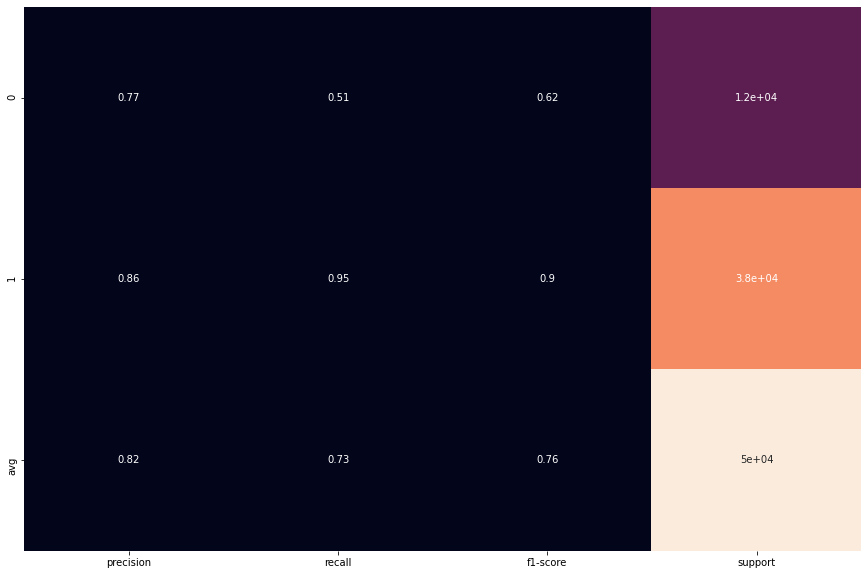

In [ ]:
function_2(test, test_y, gbm)

## Summary & Observations

1. We are building a recommendation system, thus, our main objective is to make good quality recommendations.
2. We shouldn't recommend a song that user won't like. In other words we have to reduce False Positives. Thus, False Positives matter a lot in this scenario. 
3. We need to focus more on precision & have as high precison as possible. Its kind of ok to miss a good song & not recommend it, it wont cost much; but classifying some bad song as good ones & the recommending them to user(s) may dent users' confidence in our system & may lead to loss of customers. Thus, It is important to focus more on FPs or Precision. As we can see in the classification report above, we have good precision for both target values.
4. Primary metric being used is ROC-AUC Score. Secondary metric can be used in terms of False Positives or Precision, as discussed above.
5. If we consider Accuracy as a metric, there are two downsides of using it:

    a. It may be baised towards the majority class if in case we have an imbalanced dataset. 

    b. It doesn't explicity tell us about the False Positives, which is quite important in our case.
6. If we consider F1-score, following points might go against us in this case:

    a. As per the definition, F1-score, gives equal weightage to both Precision & Recall. But here, along with TPs, FPs are more important for us than FNs. We need to focus more on precision & have as high precison as possible. Its kind of ok to miss a good song & not recommend it, it wont cost much; but classifying some bad song as good ones & the recommending them to user(s) may dent users' confidence in our system & may lead to loss of customers. Thus, It is important to focus more on FPs or Precision.

    b. It does't consider TPR and FPR simultaneosly at different thresholds, which ROC curve is capable of, & which is vital in our case.
7. Thus, looking at the above points, ROC-AUC seems the best metric in this scenario as it:

    a. Focusses more on TPs & FPs which are important here.

    b. Is unaffected by imbalance in the datset.

    c. Plots TPR & FPR at different threshold settings.

    d. Can directly help us identify how much better/worse our model is performing than a random model.

    e. Slope of the ROC curve is directly proportional to the quality of classification being made and a straight vertical line along the y-axis determines perfect classification.
    
    f. More intuitive & easy to understand/analyse. 
Thus, ROC-AUC score is the best metric here.
8. A brief overview of Exploratory Data Analysis can be found at https://share.streamlit.io/learner-subodh/streamlit-example/kkbox.py
9. Out of the models tried, it was found that LightGBM performed the best.
10. Secured a place in Top 1% on Kaggle Leaderboard for this Case Study. 
